# Creación del dataset dsualm

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 11 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 electric furnace

- 3 microwave

- 4 television

- 5 kettle

- 6 vacuum_cleaner

- 7 electric space heater

- 8 alectric shower heater

- 9 fan

- 10 fridge

- 11 freezer


Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [2]:
from nilmtk.dataset_converters import convert_ualm
convert_ualm('./data/ozm1/', 'dsual.h5','2023-03-07','2023-03-07')


Path ualm: ./data/ozm1/ /electricity

***********************************************************************************************
..Loading file    1 .csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  22.0991 -7.54384  23.351248  49.9944  247.147  0.629637   
1      1.678184e+12  22.4985 -7.95450  23.863322  49.9942  247.202  0.632288   
2      1.678184e+12  23.6133 -8.05194  24.948382  49.9942  247.190  0.624243   
3      1.678184e+12  22.9160 -7.90510  24.241202  49.9940  247.137  0.623314   
4      1.678184e+12  25.2503 -7.85989  26.445364  49.9940  247.172  0.574146   
...             ...      ...      ...        ...      ...      ...       ...   
36489  1.678191e+12  17.2421 -6.49109  18.423425  49.9896  248.690  0.553813   
36490  1.678191e+12  18.2619 -6.86620  19.510054  49.9896  248.716  0.554462   
36491  1.678191e+12  17.6728 -6.27814  18.754765  49.9894  248.676  0.549108   
36492  1.678191e+12  1

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.678184e+12  9.12492 -2.095970  9.362543  49.9948  248.333  0.787681   
1      1.678184e+12  8.82567 -1.826750  9.012738  49.9944  248.379  0.762569   
2      1.678184e+12  8.01402 -1.929480  8.243020  49.9944  248.344  0.682069   
3      1.678184e+12  8.23003 -2.050490  8.481622  49.9942  248.319  0.690446   
4      1.678184e+12  8.84426 -0.456998  8.856055  49.9942  248.335  0.506523   
...             ...      ...       ...       ...      ...      ...       ...   
36489  1.678191e+12  9.01243 -2.208270  9.279032  49.9806  250.000  0.798907   
36490  1.678191e+12  8.36301 -1.880470  8.571823  49.9806  250.004  0.804157   
36491  1.678191e+12  8.97219 -1.636350  9.120190  49.9804  249.972  0.824937   
36492  1.678191e+12  7.56718 -1.881630  7.797612  49.9802  249.922  0.801957   
36493  1.678191e+12  8.24864 -1.504850  8.384791  49.9802  249.932  0.804221   

              A  
0 

          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  7.77726 -2.03294  8.038565  49.9948  248.333  0.728679   
1      1.678184e+12  7.70183 -1.75382  7.898993  49.9944  248.379  0.714461   
2      1.678184e+12  7.45304 -2.40799  7.832385  49.9944  248.344  0.673459   
3      1.678184e+12  7.01096 -2.20655  7.349992  49.9942  248.319  0.694641   
4      1.678184e+12  7.30841 -6.39624  9.712092  49.9942  248.335  0.162790   
...             ...      ...      ...       ...      ...      ...       ...   
36489  1.678191e+12  7.04768 -2.02072  7.331648  49.9806  250.000  0.336979   
36490  1.678191e+12  7.72739 -2.02618  7.988611  49.9806  250.004  0.599054   
36491  1.678191e+12  7.30216 -1.95391  7.559053  49.9804  249.972  0.696641   
36492  1.678191e+12  7.46509 -2.45077  7.857086  49.9802  249.922  0.793080   
36493  1.678191e+12  7.72034 -2.42687  8.092796  49.9802  249.932  0.800759   

              A  
0      0.042979  
1      0.043401

Conversion of timestamp
                                        W      VAR        VA        f  \
2023-03-07 11:10:38.073000+01:00  3.04758 -1.67218  3.476191  49.9944   
2023-03-07 11:10:38.273000+01:00  3.67423 -1.56021  3.991771  49.9942   
2023-03-07 11:10:38.473000+01:00  3.28805 -1.85104  3.773276  49.9942   
2023-03-07 11:10:38.674000+01:00  3.12649 -1.73031  3.573362  49.9940   
2023-03-07 11:10:38.873000+01:00  3.83996 -2.00342  4.331167  49.9940   
...                                   ...      ...       ...      ...   
2023-03-07 13:12:14.591000+01:00  3.70550 -1.76192  4.103058  49.9896   
2023-03-07 13:12:14.791000+01:00  3.67628 -2.30640  4.339868  49.9896   
2023-03-07 13:12:14.991000+01:00  3.43264 -2.05542  4.000969  49.9894   
2023-03-07 13:12:15.191000+01:00  3.53651 -2.29790  4.217496  49.9894   
2023-03-07 13:12:15.391000+01:00  3.67424 -2.56106  4.478739  49.9890   

                                      VLN        PF         A  
2023-03-07 11:10:38.073000+01:00  2

..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.678184e+12  9.32537 -2.464010  9.645407  49.9948  248.333  0.790670   
1      1.678184e+12  9.53717 -2.514080  9.862971  49.9944  248.379  0.788887   
2      1.678184e+12  9.33392 -2.788730  9.741613  49.9944  248.344  0.666008   
3      1.678184e+12  9.58691 -2.651410  9.946798  49.9942  248.319  0.624579   
4      1.678184e+12  8.50235 -0.585586  8.522494  49.9942  248.335  0.415885   
...             ...      ...       ...       ...      ...      ...       ...   
36489  1.678191e+12  8.39523 -1.798760  8.585764  49.9806  250.000  0.809962   
36490  1.678191e+12  8.60050 -1.909200  8.809858  49.9806  250.004  0.845774   
36491  1.678191e+12  8.59398 -2.029950  8.830473  49.9804  249.972  0.825125   
36492  1.678191e+12  8.55765 -1.946210  8.776164  49.9802  249.922  0.846556   
36493  1.678191e+12  8.91435 -1.911240  9.116929  49.9802  249.932  0.810187   

              A  
0 

Conversion of timestamp
                                        W       VAR         VA        f  \
2023-03-07 11:10:38.046000+01:00  7.61768 -1.124520   7.700237  49.9948   
2023-03-07 11:10:38.246000+01:00  7.05141 -0.909240   7.109787  49.9944   
2023-03-07 11:10:38.446000+01:00  6.82124 -1.330110   6.949708  49.9944   
2023-03-07 11:10:38.646000+01:00  7.16882 -1.005770   7.239034  49.9942   
2023-03-07 11:10:38.846000+01:00  9.43979 -4.054070  10.273516  49.9942   
...                                   ...       ...        ...      ...   
2023-03-07 13:12:14.589000+01:00  6.66328 -1.410960   6.811032  49.9806   
2023-03-07 13:12:14.789000+01:00  6.21335 -0.704507   6.253158  49.9806   
2023-03-07 13:12:14.989000+01:00  6.24256 -1.601110   6.444622  49.9804   
2023-03-07 13:12:15.189000+01:00  6.19570 -1.094290   6.291590  49.9802   
2023-03-07 13:12:15.389000+01:00  6.96085 -1.670060   7.158392  49.9802   

                                      VLN        PF         A  
2023-03-07 

..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  9.32428 -3.57755   9.987043  49.9944  247.147  0.846303   
1      1.678184e+12  9.60855 -3.36797  10.181716  49.9942  247.202  0.850885   
2      1.678184e+12  9.60251 -2.89566  10.029607  49.9942  247.190  0.874312   
3      1.678184e+12  9.58635 -3.31436  10.143132  49.9940  247.137  0.845298   
4      1.678184e+12  9.67112 -3.20925  10.189693  49.9940  247.172  0.857572   
...             ...      ...      ...        ...      ...      ...       ...   
36489  1.678191e+12  8.76652 -3.21898   9.338827  49.9896  248.690  0.814606   
36490  1.678191e+12  8.98431 -3.46359   9.628826  49.9896  248.716  0.815000   
36491  1.678191e+12  8.35283 -3.31199   8.985494  49.9894  248.676  0.789166   
36492  1.678191e+12  8.53205 -3.70186   9.300514  49.9894  248.630  0.764247   
36493  1.678191e+12  8.76016 -3.49872   9.433000  49.9890  248.578  0.786364   

              A  
0 

Conversion of timestamp
                                        W      VAR         VA        f  \
2023-03-07 11:10:38.160000+01:00  9.49962 -2.54506   9.834642  50.0430   
2023-03-07 11:10:38.359000+01:00  9.66515 -2.88804  10.087409  50.0425   
2023-03-07 11:10:38.559000+01:00  9.02983 -2.78650   9.449997  50.0419   
2023-03-07 11:10:38.760000+01:00  9.26818 -2.23573   9.534026  50.0419   
2023-03-07 11:10:38.959000+01:00  9.03674 -2.18946   9.298193  50.0421   
...                                   ...      ...        ...      ...   
2023-03-07 13:12:14.659000+01:00  8.27656 -2.60421   8.676596  50.0204   
2023-03-07 13:12:14.860000+01:00  8.68970 -2.51686   9.046854  50.0202   
2023-03-07 13:12:15.060000+01:00  9.16284 -2.39700   9.471177  50.0238   
2023-03-07 13:12:15.260000+01:00  9.38272 -2.81346   9.795460  50.0252   
2023-03-07 13:12:15.460000+01:00  8.48807 -2.94635   8.984898  50.0244   

                                      VLN        PF         A  
2023-03-07 11:10:38.160

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  8.27919 -3.32329  8.921284  50.0430  246.757  0.830807   
1      1.678184e+12  8.82715 -4.21068  9.780004  50.0425  246.684  0.632766   
2      1.678184e+12  8.13951 -3.45906  8.844019  50.0419  245.835  0.836921   
3      1.678184e+12  8.22832 -3.80827  9.066871  50.0419  247.098  0.785543   
4      1.678184e+12  7.86661 -3.01599  8.424946  50.0421  246.592  0.510265   
...             ...      ...      ...       ...      ...      ...       ...   
36471  1.678191e+12  8.01664 -3.22857  8.642352  50.0204  248.214  0.807380   
36472  1.678191e+12  8.18725 -3.05498  8.738644  50.0202  247.545  0.579324   
36473  1.678191e+12  8.33964 -3.30322  8.970001  50.0238  248.542  0.793166   
36474  1.678191e+12  7.88351 -3.29144  8.543029  50.0252  248.305  0.803086   
36475  1.678191e+12  7.71389 -3.21511  8.357090  50.0244  247.884  0.802812   

              A  
0      0.04038

Conversion of timestamp
                                        W      VAR         VA        f  \
2023-03-07 11:10:38.160000+01:00  9.70459 -1.70343   9.852954  50.0430   
2023-03-07 11:10:38.359000+01:00  9.40654 -2.08848   9.635596  50.0425   
2023-03-07 11:10:38.559000+01:00  9.59462 -2.17803   9.838727  50.0419   
2023-03-07 11:10:38.760000+01:00  9.88155 -2.06080  10.094149  50.0419   
2023-03-07 11:10:38.959000+01:00  9.85785 -1.77212  10.015867  50.0421   
...                                   ...      ...        ...      ...   
2023-03-07 13:12:14.659000+01:00  8.81806 -2.71574   9.226775  50.0204   
2023-03-07 13:12:14.859000+01:00  9.44776 -2.21975   9.705022  50.0202   
2023-03-07 13:12:15.060000+01:00  9.89497 -2.24108  10.145580  50.0238   
2023-03-07 13:12:15.259000+01:00  9.32844 -2.12798   9.568078  50.0252   
2023-03-07 13:12:15.460000+01:00  9.66039 -2.39097   9.951878  50.0244   

                                      VLN        PF         A  
2023-03-07 11:10:38.160

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  8.48107 -2.37765  8.808050  50.0430  246.757  0.810394   
1      1.678184e+12  8.55211 -2.70065  8.968393  50.0425  246.684  0.744958   
2      1.678184e+12  7.92745 -2.77020  8.397524  50.0419  245.835  0.840469   
3      1.678184e+12  8.64608 -2.98154  9.145724  50.0419  247.098  0.822757   
4      1.678184e+12  8.44640 -3.02546  8.971908  50.0421  246.592  0.706513   
...             ...      ...      ...       ...      ...      ...       ...   
36472  1.678191e+12  8.23880 -2.91033  8.737724  50.0204  248.214  0.833919   
36473  1.678191e+12  8.67808 -3.44992  9.338684  50.0202  247.545  0.720240   
36474  1.678191e+12  8.66752 -3.29412  9.272388  50.0238  248.542  0.829965   
36475  1.678191e+12  9.37141 -3.39220  9.966460  50.0252  248.305  0.843649   
36476  1.678191e+12  9.17099 -3.20873  9.716121  50.0244  247.884  0.850830   

              A  
0      0.04241

Done converting YAML metadata to HDF5!
Successfully performed the conversion of ualM to HDF5 format! 


Convertidos los metdatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsual.h5 que contiene los datos recopilados y metadatos del dataset.

In [3]:
#dataset de referencia 
dsualm = DataSet('dsual.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [4]:
elec = dsualm.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(inst

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [5]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [6]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [7]:
elec.mains().power_series_all_data().head()

2023-03-07 11:10:38+01:00    23.27544
2023-03-07 11:10:39+01:00    22.11520
2023-03-07 11:10:40+01:00    21.88566
2023-03-07 11:10:41+01:00    21.48184
2023-03-07 11:10:42+01:00    21.43676
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', insta

### Etiquetas de dispositivos

In [9]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [10]:
print_dict(dsualm.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [11]:
print_dict(dsualm.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [12]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]

print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 7 o elec[7]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 8 o elec[8]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 9 o elec[9]


print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 10 o elec[10]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 11 o elec[11]




# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [13]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [14]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [15]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [16]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [17]:
boiler_meter.total_energy() # kWh

active      0.513943
reactive    0.001735
apparent    0.514472
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [18]:
next(boiler_meter.load())

physical_quantity             power                voltage  frequency  \
type                       reactive     active                          
2023-03-07 11:10:38+01:00 -2.200763   9.257144  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -2.226764   9.127736  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -2.472102   9.274290  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -2.293642   9.395462  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -2.670114   9.200360  248.331604  49.996418   
...                             ...        ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.227194   8.746068  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -2.011698   8.816102  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -2.625742   8.148310  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -1.399203  10.467334  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -1.928725   8.736000  249.927002  49.980202   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.657206  0.059347   9.543857  
2023-03-07 11:10:39+01:00  0.738686  0.049948   9.401801  
2023-03-07 11:10:40+01:00  0.791097  0.047219   9.601892  
2023-03-07 11:10:41+01:00  0.733495  0.052749   9.677088  
2023-03-07 11:10:42+01:00  0.707808  0.052949   9.596699  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.770463  0.045650   9.025548  
2023-03-07 13:12:12+01:00  0.801396  0.044271   9.047188  
2023-03-07 13:12:13+01:00  0.669925  0.051037   8.603168  
2023-03-07 13:12:14+01:00  0.692862  0.093916  10.629998  
2023-03-07 13:12:15+01:00  0.828372  0.042236   8.946547  

[7298 rows x 7 columns]

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [19]:
next (boiler_meter.power_series())

2023-03-07 11:10:38+01:00     9.257144
2023-03-07 11:10:39+01:00     9.127736
2023-03-07 11:10:40+01:00     9.274290
2023-03-07 11:10:41+01:00     9.395462
2023-03-07 11:10:42+01:00     9.200360
                               ...    
2023-03-07 13:12:11+01:00     8.746068
2023-03-07 13:12:12+01:00     8.816102
2023-03-07 13:12:13+01:00     8.148310
2023-03-07 13:12:14+01:00    10.467334
2023-03-07 13:12:15+01:00     8.736000
Name: (power, active), Length: 7298, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

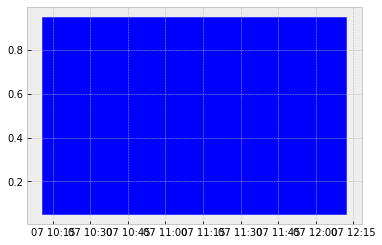

In [20]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [21]:
good_sections.combined()

[TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [22]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALM::

In [23]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [24]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [25]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='DSUAL', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [26]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['current', 'power', 'voltage', 'frequency', 'pf']

In [27]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['current', 'power', 'voltage', 'pf', 'frequency']

In [28]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (boiler)


['current', 'power', 'voltage', 'pf', 'frequency']

In [29]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (fan)


['current', 'power', 'voltage', 'pf', 'frequency']

In [30]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (freezer)


['current', 'power', 'voltage', 'pf', 'frequency']

In [31]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (television)


['current', 'power', 'voltage', 'pf', 'frequency']

In [32]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)


['current', 'power', 'voltage', 'pf', 'frequency']

In [33]:
elec[7].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'power', 'voltage', 'pf', 'frequency']

In [34]:
elec[8].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'power', 'voltage', 'pf', 'frequency']

In [35]:
elec[9].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'power', 'voltage', 'pf', 'frequency']

In [36]:
elec[10].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'power', 'voltage', 'pf', 'frequency']

In [37]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (vacuum cleaner)

['current', 'power', 'voltage', 'pf', 'frequency']

## Medidas disponibles relativas a la potencia


In [38]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active', 'apparent', 'reactive']

In [39]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active', 'apparent', 'reactive']

In [40]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active', 'apparent', 'reactive']

In [41]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active', 'apparent', 'reactive']

In [42]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active', 'apparent', 'reactive']

In [43]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [44]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [45]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [46]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [47]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

In [48]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active', 'apparent', 'reactive']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [49]:
fan = elec['fan']
fan.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [50]:
kettle = elec['kettle']
kettle.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [51]:
fan = elec['fan']
fan.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [52]:
television = elec['television']
television.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [53]:
microwave = elec['microwave']
microwave.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [54]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [55]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [56]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [57]:
fridge = elec[10]
fridge.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

In [58]:
freezer = elec[11]
freezer.available_columns()

[('power', 'reactive'),
 ('power', 'active'),
 ('voltage', None),
 ('frequency', None),
 ('pf', None),
 ('current', None),
 ('power', 'apparent')]

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [59]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['current', 'power', 'voltage', 'frequency', 'pf']
Mediciones de Potencia disponibles - Dataset: ['active', 'apparent', 'reactive']

Medidas disponibles por cada medidor:
Main: ['current', 'power', 'voltage', 'pf', 'frequency']
Electric furnace: ['current', 'power', 'voltage', 'pf', 'frequency']
Microwave: ['current', 'power', 'voltage', 'pf', 'frequency']
Television: ['current', 'power', 'voltage', 'pf', 'frequency']
Kettle: ['current', 'power', 'voltage', 'pf', 'frequency']
Vacuum cleaner: ['current', 'power', 'voltage', 'pf', 'frequency']
Electric space heater: ['current', 'power', 'voltage', 'pf', 'frequency']
Electric shower heater: ['current', 'power', 'voltage', 'pf', 'frequency']
Fan: ['current', 'power', 'voltage', 'pf', 'frequency']
Fridge: ['current', 'power', 'voltage', 'pf', 'frequency']
Freezer: ['current', 'power', 'voltage', 'pf', 'frequency']

Medidas de potencia por cada medidor:
Main: ['active', 'apparent', 'reactive']
Electric furna

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [60]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

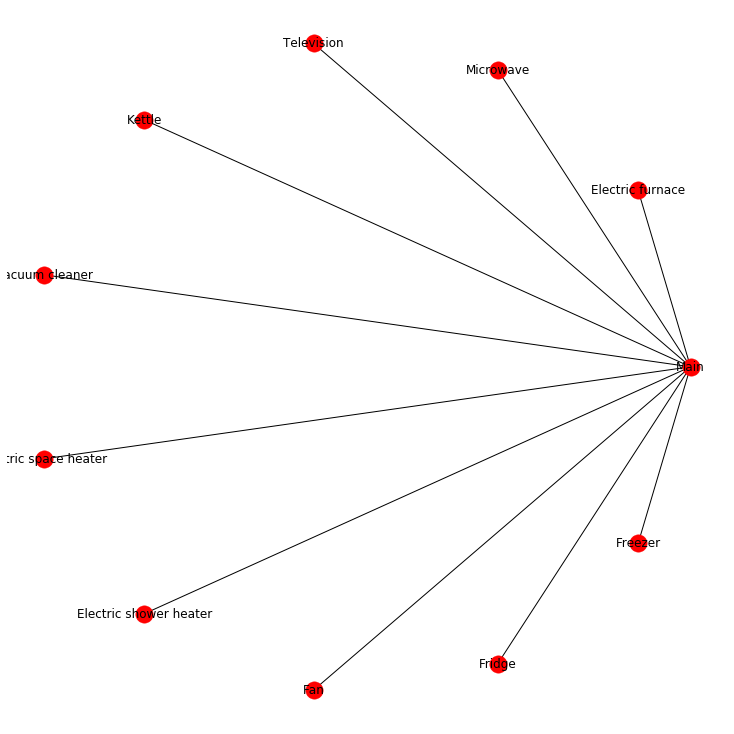

In [61]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [62]:
elec.get_timeframe()

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 6 (es decir todos menos el principal). 

In [63]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,8.736293,7.425974,3.417993,9.282116,7.090158,9.360298,9.407841,8.282000,9.769106,8.530680
2023-03-07 11:11:00+01:00,8.242806,1005.352539,3.043011,10.355904,6.752708,9.101993,1001.376343,30.299625,9.128572,8.009095
2023-03-07 11:12:00+01:00,8.162766,1192.359253,2.941083,10.633374,6.478604,9.154854,1153.701660,33.417152,8.962694,7.871211
2023-03-07 11:13:00+01:00,8.509245,179.789810,3.228436,9.501419,602.397522,9.317653,174.449219,11.780659,9.433947,8.326084
2023-03-07 11:14:00+01:00,8.599349,6.917178,3.322737,9.273390,689.681213,9.335614,9.057565,8.134767,9.535052,8.430833
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,8.644561,1221.730225,36.210995,11.452597,686.830017,8.072697,8.739935,35.173248,68.908745,9.224905
2023-03-07 13:09:00+01:00,8.642417,1208.775024,36.113918,11.255421,505.747131,8.481352,8.788926,35.360058,67.595314,35.294678
2023-03-07 13:10:00+01:00,8.753292,1200.001831,36.011757,11.374311,6.535860,8.608611,8.888576,35.625957,67.156403,66.909576
2023-03-07 13:11:00+01:00,8.738419,883.726379,27.587330,10.569299,6.526439,8.555268,8.878031,28.600861,52.190022,48.337955


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [64]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,-2.019701,-2.255860,-1.654389,-2.339900,-1.078213,-3.260932,-2.797649,-3.587031,-1.798988,-2.908646
2023-03-07 11:11:00+01:00,-1.777144,364.842102,-1.472253,-2.766885,-1.051509,-3.129782,-1.347650,-3.333890,-1.795415,-2.791667
2023-03-07 11:12:00+01:00,-1.782398,379.917908,-1.459327,-2.925729,-1.050459,-3.151175,-1.380151,-3.604555,-1.861729,-2.801501
2023-03-07 11:13:00+01:00,-2.026478,51.783581,-1.595134,-2.326277,38.642662,-3.262123,-2.806911,-3.667592,-1.911316,-2.938560
2023-03-07 11:14:00+01:00,-2.080529,-2.304233,-1.662503,-2.234543,42.345303,-3.319265,-3.084054,-3.527526,-1.915823,-2.869786
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,-1.773819,413.821167,-10.485499,-3.159504,37.762730,-3.167038,-2.764742,-3.390670,8.120720,-3.232997
2023-03-07 13:09:00+01:00,-1.794829,401.003693,-10.598455,-3.117389,27.401661,-3.352432,-2.790724,-3.452050,8.232163,4.848520
2023-03-07 13:10:00+01:00,-1.708426,407.011200,-10.891865,-3.337682,-1.312524,-3.481375,-2.785291,-3.539579,8.463218,14.187236
2023-03-07 13:11:00+01:00,-1.854790,294.014496,-8.821270,-3.064396,-1.301301,-3.463948,-2.758747,-3.458657,5.704713,9.732674


Por ultimo, veamos la potencia aparente de los medidores del 2 al 6 (todos menos el principal).

In [65]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,8.974254,7.775111,3.804174,9.581534,7.182541,9.915387,9.820017,9.049794,9.936172,9.020437
2023-03-07 11:11:00+01:00,8.441184,1082.850586,3.389313,10.734695,6.848741,9.628225,1001.436157,30.542427,9.306473,8.488317
2023-03-07 11:12:00+01:00,8.364808,1251.460815,3.291454,11.041277,6.576358,9.684772,1153.702515,33.616970,9.158269,8.363773
2023-03-07 11:13:00+01:00,8.763378,188.260941,3.609519,9.822177,603.697632,9.877041,174.907211,12.620271,9.630011,8.875997
2023-03-07 11:14:00+01:00,8.853654,7.306756,3.723840,9.547350,690.980286,9.911135,9.572784,8.887359,9.728581,8.913923
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,8.834238,1289.930054,37.699596,11.899589,687.868225,8.676427,9.171579,35.346424,69.386909,9.788071
2023-03-07 13:09:00+01:00,8.843115,1273.579468,37.638428,11.725695,506.552246,9.125580,9.226917,35.558556,68.096802,36.660740
2023-03-07 13:10:00+01:00,8.929551,1267.151733,37.624012,11.881701,6.693266,9.290974,9.319632,35.806778,67.688988,68.399536
2023-03-07 13:11:00+01:00,8.945592,931.728882,29.010574,11.045566,6.674392,9.234453,9.301411,28.966055,52.662815,49.673168


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [66]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-03-07 11:10:00+01:00 to 2023-03-07 13:12:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          123 non-null float32
(Microwave,)                 123 non-null float32
(Television,)                123 non-null float32
(Kettle,)                    123 non-null float32
(Vacuum cleaner,)            123 non-null float32
(Electric space heater,)     123 non-null float32
(Electric shower heater,)    123 non-null float32
(Fan,)                       123 non-null float32
(Fridge,)                    123 non-null float32
(Freezer,)                   123 non-null float32
dtypes: float32(10)
memory usage: 5.8 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2(horno) con datos capturados de 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [68]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -1.671938  8.607780  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -1.951616  8.755964  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -2.103798  8.470732  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -2.315592  8.673759  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -2.287690  8.846306  248.331604  49.996418   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -1.867904  8.624490  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -1.707960  8.741454  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -2.135848  8.601004  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -1.703728  9.467966  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -1.693240  7.907910  249.927002  49.980202   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.685858  0.051774  8.791195  
2023-03-07 11:10:39+01:00  0.750987  0.046945  8.976777  
2023-03-07 11:10:40+01:00  0.772390  0.044214  8.729770  
2023-03-07 11:10:41+01:00  0.765076  0.045661  8.979209  
2023-03-07 11:10:42+01:00  0.752339  0.047455  9.139336  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.800050  0.043127  8.828792  
2023-03-07 13:12:12+01:00  0.813320  0.042987  8.907597  
2023-03-07 13:12:13+01:00  0.793228  0.043518  8.876321  
2023-03-07 13:12:14+01:00  0.736781  0.057974  9.635614  
2023-03-07 13:12:15+01:00  0.803089  0.039397  8.091202  

[7298 rows x 7 columns]

Se puede visualizar solo la cabecera de los datos

In [171]:
df_ef.head()

physical_quantity           current  frequency     power        pf     power  \
type                                              active            apparent   
2022-11-23 09:42:37+01:00  0.036610  50.048401  7.008195  0.779828  7.218613   
2022-11-23 09:42:38+01:00  0.039942  50.048519  7.683460  0.783627  7.872020   
2022-11-23 09:42:39+01:00  0.037553  50.046101  7.506026  0.815136  7.685831   
2022-11-23 09:42:40+01:00  0.038323  50.042881  7.278238  0.774195  7.424030   
2022-11-23 09:42:41+01:00  0.039820  50.042179  7.585696  0.776545  7.774941   

physical_quantity                       voltage  
type                       reactive              
2022-11-23 09:42:37+01:00 -1.691935  245.471497  
2022-11-23 09:42:38+01:00 -1.697002  245.451401  
2022-11-23 09:42:39+01:00 -1.635726  245.270599  
2022-11-23 09:42:40+01:00 -1.403614  245.255005  
2022-11-23 09:42:41+01:00 -1.686918  245.396606

Vemos para el meter nº 3( microondas) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [72]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final





df_m = next(elec[3].load())[t0:t1] #DataFrame medidor 
df_m

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -2.959508  7.450300  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -2.277038  7.509158  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -2.325594  7.125000  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -2.431390  7.417568  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -2.233690  7.533740  248.331604  49.996418   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.365360  7.584904  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -2.380986  7.312476  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -2.197518  7.543698  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -2.162328  7.236300  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -2.438820  7.592715  249.927002  49.980202   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.594806  0.070474  8.166405  
2023-03-07 11:10:39+01:00  0.683701  0.044598  7.852457  
2023-03-07 11:10:40+01:00  0.700746  0.040998  7.495531  
2023-03-07 11:10:41+01:00  0.723833  0.041251  7.807698  
2023-03-07 11:10:42+01:00  0.730148  0.041556  7.859463  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.756085  0.040151  7.948555  
2023-03-07 13:12:12+01:00  0.770804  0.037950  7.692169  
2023-03-07 13:12:13+01:00  0.784765  0.038489  7.862349  
2023-03-07 13:12:14+01:00  0.591012  0.052812  7.560880  
2023-03-07 13:12:15+01:00  0.796919  0.038120  7.974941  

[7298 rows x 7 columns]

Vemos para el meter nº 4(television) con datos capturados de  09:40 a 11:44  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [73]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final




df_ef = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
df_ef

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -1.763432  3.395262  247.169601  49.994160   
2023-03-07 11:10:39+01:00 -1.584530  3.431820  247.230804  49.994041   
2023-03-07 11:10:40+01:00 -1.782614  3.506840  247.139801  49.994320   
2023-03-07 11:10:41+01:00 -1.734612  3.534198  247.217606  49.995201   
2023-03-07 11:10:42+01:00 -1.720372  3.463536  247.169205  49.995762   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.256564  3.145490  248.646408  49.994480   
2023-03-07 13:12:12+01:00 -2.150434  3.495464  248.706390  49.992779   
2023-03-07 13:12:13+01:00 -2.125296  3.238046  248.516998  49.990879   
2023-03-07 13:12:14+01:00 -1.960838  3.566508  248.687607  49.989639   
2023-03-07 13:12:15+01:00 -2.429480  3.605375  248.604004  49.989197   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.534009  0.025710  3.829153  
2023-03-07 11:10:39+01:00  0.575757  0.024137  3.780963  
2023-03-07 11:10:40+01:00  0.577130  0.024551  3.943635  
2023-03-07 11:10:41+01:00  0.564263  0.025306  3.944993  
2023-03-07 11:10:42+01:00  0.573035  0.024439  3.871523  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.444255  0.028521  3.875268  
2023-03-07 13:12:12+01:00  0.558066  0.025217  4.121253  
2023-03-07 13:12:13+01:00  0.512634  0.025483  3.878191  
2023-03-07 13:12:14+01:00  0.554503  0.025872  4.073915  
2023-03-07 13:12:15+01:00  0.539088  0.026993  4.348118  

[7298 rows x 7 columns]

Veamos para el meter nº 5(tetera)  con datos capturados de 10:16 a 12:58 tenemos la siguinte tabla que nos muestra todas las medidas

In [74]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final




df_sh = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_sh

physical_quantity             power                voltage  frequency  \
type                       reactive     active                          
2023-03-07 11:10:38+01:00 -2.200763   9.257144  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -2.226764   9.127736  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -2.472102   9.274290  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -2.293642   9.395462  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -2.670114   9.200360  248.331604  49.996418   
...                             ...        ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.227194   8.746068  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -2.011698   8.816102  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -2.625742   8.148310  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -1.399203  10.467334  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -1.928725   8.736000  249.927002  49.980202   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.657206  0.059347   9.543857  
2023-03-07 11:10:39+01:00  0.738686  0.049948   9.401801  
2023-03-07 11:10:40+01:00  0.791097  0.047219   9.601892  
2023-03-07 11:10:41+01:00  0.733495  0.052749   9.677088  
2023-03-07 11:10:42+01:00  0.707808  0.052949   9.596699  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.770463  0.045650   9.025548  
2023-03-07 13:12:12+01:00  0.801396  0.044271   9.047188  
2023-03-07 13:12:13+01:00  0.669925  0.051037   8.603168  
2023-03-07 13:12:14+01:00  0.692862  0.093916  10.629998  
2023-03-07 13:12:15+01:00  0.828372  0.042236   8.946547  

[7298 rows x 7 columns]

Veamos para el meter nº 6(Aspiradora) con datos capturados de  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_vc

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -1.684742  7.619788  248.341995  49.994400   
2023-03-07 11:10:39+01:00 -1.061649  7.134564  248.392807  49.994122   
2023-03-07 11:10:40+01:00 -1.328910  6.991344  248.298996  49.993999   
2023-03-07 11:10:41+01:00 -1.207147  6.560062  248.386002  49.995682   
2023-03-07 11:10:42+01:00 -1.268153  7.110670  248.331604  49.996418   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -1.269902  6.632002  249.955002  49.985119   
2023-03-07 13:12:12+01:00 -1.447212  6.527954  250.007202  49.982960   
2023-03-07 13:12:13+01:00 -1.445601  6.313202  249.822601  49.981480   
2023-03-07 13:12:14+01:00 -1.001184  7.241482  249.993393  49.980640   
2023-03-07 13:12:15+01:00 -1.382175  6.578275  249.927002  49.980202   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.589060  0.062341  7.854456  
2023-03-07 11:10:39+01:00  0.687267  0.041863  7.218447  
2023-03-07 11:10:40+01:00  0.721059  0.039085  7.120562  
2023-03-07 11:10:41+01:00  0.631312  0.046216  6.675759  
2023-03-07 11:10:42+01:00  0.688565  0.041642  7.230792  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.722085  0.036786  6.754900  
2023-03-07 13:12:12+01:00  0.729416  0.035917  6.697008  
2023-03-07 13:12:13+01:00  0.695515  0.036699  6.502201  
2023-03-07 13:12:14+01:00  0.605597  0.059426  7.344870  
2023-03-07 13:12:15+01:00  0.767026  0.034296  6.724991  

[7298 rows x 7 columns]

Veamos para el ultimo meter nº 7(estufa de aceite) con datos capturados  09:40 a 11:44  tenemos la siguinte tabla que nos muestra todas las medidas

In [77]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_sph = next(elec[7].load())[t0:t1] #DataFrame medidor boiler
df_sph

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -3.272958  9.558562  247.169601  49.994160   
2023-03-07 11:10:39+01:00 -3.090244  9.268114  247.230804  49.994041   
2023-03-07 11:10:40+01:00 -3.354494  9.362672  247.139801  49.994320   
2023-03-07 11:10:41+01:00 -3.259112  9.360446  247.217606  49.995201   
2023-03-07 11:10:42+01:00 -3.299036  9.571120  247.169205  49.995762   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -3.552560  8.816136  248.646408  49.994480   
2023-03-07 13:12:12+01:00 -3.574316  9.010560  248.706390  49.992779   
2023-03-07 13:12:13+01:00 -3.522252  8.828824  248.516998  49.990879   
2023-03-07 13:12:14+01:00 -3.501074  8.820022  248.687607  49.989639   
2023-03-07 13:12:15+01:00 -3.600290  8.646105  248.604004  49.989197   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.854874  0.045241  10.106237  
2023-03-07 11:10:39+01:00  0.841929  0.044518   9.771827  
2023-03-07 11:10:40+01:00  0.841325  0.045027   9.945864  
2023-03-07 11:10:41+01:00  0.827148  0.045833   9.913514  
2023-03-07 11:10:42+01:00  0.851969  0.045452  10.125294  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.777064  0.045657   9.510147  
2023-03-07 13:12:12+01:00  0.809852  0.044750   9.697207  
2023-03-07 13:12:13+01:00  0.823921  0.043139   9.516606  
2023-03-07 13:12:14+01:00  0.808332  0.043874   9.490859  
2023-03-07 13:12:15+01:00  0.775306  0.044859   9.366756  

[7298 rows x 7 columns]

Veamos para el ultimo meter nº 8(calentador de agua) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [78]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_shh = next(elec[8].load())[t0:t1] #DataFrame medidor boiler
df_shh

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -2.528958  9.299904  246.593201  50.042278   
2023-03-07 11:10:39+01:00 -2.676130  9.570068  246.701401  50.041981   
2023-03-07 11:10:40+01:00 -2.865250  9.518566  246.692200  50.042622   
2023-03-07 11:10:41+01:00 -2.531298  9.627158  246.819199  50.043560   
2023-03-07 11:10:42+01:00 -2.797586  9.626934  246.780594  50.043758   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.696646  8.833302  248.207397  50.023521   
2023-03-07 13:12:12+01:00 -2.822792  8.848138  248.235397  50.024319   
2023-03-07 13:12:13+01:00 -2.741824  8.884596  248.083801  50.024281   
2023-03-07 13:12:14+01:00 -2.653596  8.952826  248.112198  50.020782   
2023-03-07 13:12:15+01:00 -2.718937  9.011209  248.243668  50.024467   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.800144  0.047923   9.640853  
2023-03-07 11:10:39+01:00  0.866106  0.044784   9.939991  
2023-03-07 11:10:40+01:00  0.849275  0.045473   9.942685  
2023-03-07 11:10:41+01:00  0.822520  0.047974   9.966635  
2023-03-07 11:10:42+01:00  0.839393  0.046657  10.033474  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.841064  0.042321   9.236321  
2023-03-07 13:12:12+01:00  0.833940  0.042752   9.288075  
2023-03-07 13:12:13+01:00  0.849621  0.042145   9.300225  
2023-03-07 13:12:14+01:00  0.829588  0.043591   9.341162  
2023-03-07 13:12:15+01:00  0.803864  0.045450   9.417178  

[7298 rows x 7 columns]

Veamos para el ultimo meter nº 9(ventilador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [79]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler
df_fan

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -3.563458  8.268156  246.593201  50.042278   
2023-03-07 11:10:39+01:00 -3.749924  8.348816  246.701401  50.041981   
2023-03-07 11:10:40+01:00 -3.830046  8.293010  246.692200  50.042622   
2023-03-07 11:10:41+01:00 -2.672444  9.958226  246.819199  50.043560   
2023-03-07 11:10:42+01:00 -3.500664  8.066022  246.780594  50.043758   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -3.260118  8.158463  248.207397  50.023521   
2023-03-07 13:12:12+01:00 -3.323544  8.091916  248.235397  50.024319   
2023-03-07 13:12:13+01:00 -3.125352  8.289894  248.083801  50.024281   
2023-03-07 13:12:14+01:00 -3.162560  8.084880  248.112198  50.020782   
2023-03-07 13:12:15+01:00 -3.269923  7.979013  248.243668  50.024467   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.719260  0.048281   9.007425  
2023-03-07 11:10:39+01:00  0.773450  0.044284   9.153992  
2023-03-07 11:10:40+01:00  0.769773  0.044474   9.141488  
2023-03-07 11:10:41+01:00  0.662245  0.115466  10.652125  
2023-03-07 11:10:42+01:00  0.815981  0.040052   8.793616  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.757547  0.043917   8.795714  
2023-03-07 13:12:12+01:00  0.770911  0.043154   8.752522  
2023-03-07 13:12:13+01:00  0.795820  0.042684   8.865893  
2023-03-07 13:12:14+01:00  0.724625  0.046308   8.683452  
2023-03-07 13:12:15+01:00  0.799688  0.040200   8.623373  

[7298 rows x 7 columns]

Veamos para el ultimo meter nº 10(nevera) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [80]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_fridge = next(elec[10].load())[t0:t1] #DataFrame medidor boiler
df_fridge

physical_quantity             power                voltage  frequency  \
type                       reactive     active                          
2023-03-07 11:10:38+01:00 -1.960572   9.689030  246.593201  50.042278   
2023-03-07 11:10:39+01:00 -1.984876   9.872231  246.701401  50.041981   
2023-03-07 11:10:40+01:00 -1.834762   9.959566  246.692200  50.042622   
2023-03-07 11:10:41+01:00 -1.560478  10.066302  246.819199  50.043560   
2023-03-07 11:10:42+01:00 -1.766572   9.866742  246.780594  50.043758   
...                             ...        ...         ...        ...   
2023-03-07 13:12:11+01:00 -2.318192   9.113432  248.207397  50.023521   
2023-03-07 13:12:12+01:00 -2.459084   9.302838  248.235397  50.024319   
2023-03-07 13:12:13+01:00 -2.115070   9.001544  248.083801  50.024281   
2023-03-07 13:12:14+01:00 -2.301210   9.005334  248.112198  50.020782   
2023-03-07 13:12:15+01:00 -2.253343   9.627934  248.243668  50.024467   

physical_quantity                pf   current      power  
type                                            apparent  
2023-03-07 11:10:38+01:00  0.887172  0.044300   9.887459  
2023-03-07 11:10:39+01:00  0.898102  0.044554  10.071445  
2023-03-07 11:10:40+01:00  0.898601  0.044934  10.129463  
2023-03-07 11:10:41+01:00  0.823349  0.051632  10.191502  
2023-03-07 11:10:42+01:00  0.885727  0.045180  10.025020  
...                             ...       ...        ...  
2023-03-07 13:12:11+01:00  0.864196  0.042496   9.407586  
2023-03-07 13:12:12+01:00  0.877776  0.042701   9.625039  
2023-03-07 13:12:13+01:00  0.891007  0.040728   9.247926  
2023-03-07 13:12:14+01:00  0.869121  0.041769   9.298128  
2023-03-07 13:12:15+01:00  0.893376  0.043422   9.888512  

[7298 rows x 7 columns]

Veamos para el ultimo meter nº 11(congelador) con datos capturados 09:40 a 11:44 tenemos la siguinte tabla que nos muestra todas las medidas

In [81]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_freezer = next(elec[11].load())[t0:t1] #DataFrame medidor boiler
df_freezer

physical_quantity             power               voltage  frequency  \
type                       reactive    active                          
2023-03-07 11:10:38+01:00 -2.771100  8.410622  246.593201  50.042278   
2023-03-07 11:10:39+01:00 -2.796638  8.503956  246.701401  50.041981   
2023-03-07 11:10:40+01:00 -3.000540  8.553123  246.692200  50.042622   
2023-03-07 11:10:41+01:00 -2.510622  9.384454  246.819199  50.043560   
2023-03-07 11:10:42+01:00 -2.781702  8.475520  246.780594  50.043758   
...                             ...       ...         ...        ...   
2023-03-07 13:12:11+01:00 -3.104730  8.646200  248.207397  50.023521   
2023-03-07 13:12:12+01:00 -3.170596  8.697444  248.235397  50.024319   
2023-03-07 13:12:13+01:00 -2.925816  8.678968  248.083801  50.024281   
2023-03-07 13:12:14+01:00 -3.136296  8.571296  248.112198  50.020782   
2023-03-07 13:12:15+01:00 -3.298350  9.069973  248.243668  50.024467   

physical_quantity                pf   current     power  
type                                           apparent  
2023-03-07 11:10:38+01:00  0.785018  0.043665  8.858319  
2023-03-07 11:10:39+01:00  0.812982  0.042525  8.961302  
2023-03-07 11:10:40+01:00  0.814707  0.042623  9.064667  
2023-03-07 11:10:41+01:00  0.709903  0.074963  9.791112  
2023-03-07 11:10:42+01:00  0.838037  0.041014  8.922050  
...                             ...       ...       ...  
2023-03-07 13:12:11+01:00  0.818294  0.042605  9.190468  
2023-03-07 13:12:12+01:00  0.821568  0.042761  9.259890  
2023-03-07 13:12:13+01:00  0.828163  0.042323  9.164179  
2023-03-07 13:12:14+01:00  0.798141  0.043516  9.129144  
2023-03-07 13:12:15+01:00  0.841481  0.043413  9.651656  

[7298 rows x 7 columns]

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [82]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9788885250933875

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [83]:
series = next(fan.power_series())
series.head()

2023-03-07 11:10:38+01:00    8.268156
2023-03-07 11:10:39+01:00    8.348816
2023-03-07 11:10:40+01:00    8.293010
2023-03-07 11:10:41+01:00    9.958226
2023-03-07 11:10:42+01:00    8.066022
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [84]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2023-03-07 11:10:38+01:00   -3.563458
2023-03-07 11:10:39+01:00   -3.749924
2023-03-07 11:10:40+01:00   -3.830046
2023-03-07 11:10:41+01:00   -2.672444
2023-03-07 11:10:42+01:00   -3.500664
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [85]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2023-03-07 11:10:38+01:00,-3.563458
2023-03-07 11:10:39+01:00,-3.749924
2023-03-07 11:10:40+01:00,-3.830046
2023-03-07 11:10:41+01:00,-2.672444
2023-03-07 11:10:42+01:00,-3.500664


Para cargar datos de voltaje:

In [86]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity,voltage
type,
2023-03-07 11:10:38+01:00,246.593201
2023-03-07 11:10:39+01:00,246.701401
2023-03-07 11:10:40+01:00,246.692200
2023-03-07 11:10:41+01:00,246.819199
2023-03-07 11:10:42+01:00,246.780594


In [87]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity             power                     
type                       reactive    active   apparent
2023-03-07 11:10:38+01:00 -3.563458  8.268156   9.007425
2023-03-07 11:10:39+01:00 -3.749924  8.348816   9.153992
2023-03-07 11:10:40+01:00 -3.830046  8.293010   9.141488
2023-03-07 11:10:41+01:00 -2.672444  9.958226  10.652125
2023-03-07 11:10:42+01:00 -3.500664  8.066022   8.793616

### Cargando especificando el tipo de CA

In [88]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-03-07 11:10:38+01:00,8.268156
2023-03-07 11:10:39+01:00,8.348816
2023-03-07 11:10:40+01:00,8.293010
2023-03-07 11:10:41+01:00,9.958226
2023-03-07 11:10:42+01:00,8.066022


### Cargando por remuestreo a un período específico

In [89]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-03-07 11:10:00+01:00,8.282000
2023-03-07 11:11:00+01:00,30.299625
2023-03-07 11:12:00+01:00,33.417152
2023-03-07 11:13:00+01:00,11.780659
2023-03-07 11:14:00+01:00,8.134767


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 

In [90]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9788885250933875

## Potencia activa, aparente y reactiva

In [91]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


physical_quantity               power              voltage  pf frequency  \
type                         reactive       active     NaN NaN       NaN   
2023-03-07 11:10:00+01:00  -31.008612   102.924446     NaN NaN       NaN   
2023-03-07 11:11:00+01:00  710.260193  4478.596680     NaN NaN       NaN   
2023-03-07 11:12:00+01:00  740.342285  5220.030273     NaN NaN       NaN   
2023-03-07 11:13:00+01:00  164.235138  2147.954834     NaN NaN       NaN   
2023-03-07 11:14:00+01:00   63.604633  1589.444092     NaN NaN       NaN   
...                               ...          ...     ...  ..       ...   
2023-03-07 13:08:00+01:00  881.379395  4280.763184     NaN NaN       NaN   
2023-03-07 13:09:00+01:00  847.874512  3912.312988     NaN NaN       NaN   
2023-03-07 13:10:00+01:00  815.827820  2869.079102     NaN NaN       NaN   
2023-03-07 13:11:00+01:00  581.940063  2129.082764     NaN NaN       NaN   
2023-03-07 13:12:00+01:00  -31.017702    95.994705     NaN NaN       NaN   

physical_quantity         current        power  
type                          NaN     apparent  
2023-03-07 11:10:00+01:00     NaN   107.884430  
2023-03-07 11:11:00+01:00     NaN  4589.562012  
2023-03-07 11:12:00+01:00     NaN  5307.483398  
2023-03-07 11:13:00+01:00     NaN  2165.967041  
2023-03-07 11:14:00+01:00     NaN  1595.765503  
...                           ...          ...  
2023-03-07 13:08:00+01:00     NaN  4400.159180  
2023-03-07 13:09:00+01:00     NaN  4030.874512  
2023-03-07 13:10:00+01:00     NaN  3000.936523  
2023-03-07 13:11:00+01:00     NaN  2225.002441  
2023-03-07 13:12:00+01:00     NaN   101.666313  

[123 rows x 7 columns]

### Energia Total

In [92]:
elec.mains().total_energy() # returns kWh

active      4.112951
reactive    0.183257
apparent    4.127224
dtype: float64

In [93]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

#df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()


df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

11/11 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,48.70,340.90,1460.98
Electric furnace,9.18,64.26,275.41
Microwave,5.17,36.16,154.98
Television,0.48,3.38,14.47
Kettle,6.09,42.60,182.56
Vacuum cleaner,3.88,27.19,116.54
Electric space heater,8.91,62.36,267.27
Electric shower heater,9.83,68.84,295.02
Fan,0.49,3.46,14.82
Fridge,0.85,5.96,25.54


### Energia por submedidor

Veamos la energia  para el submedidor

In [94]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.775325,0.436295,0.040739,0.513943,0.328076,0.752422,0.830527,0.041723,0.071897,0.049799
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [95]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [96]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [97]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

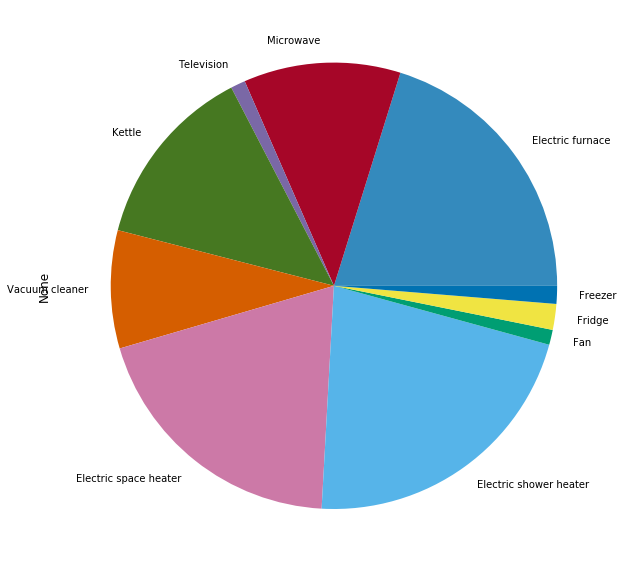

In [98]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

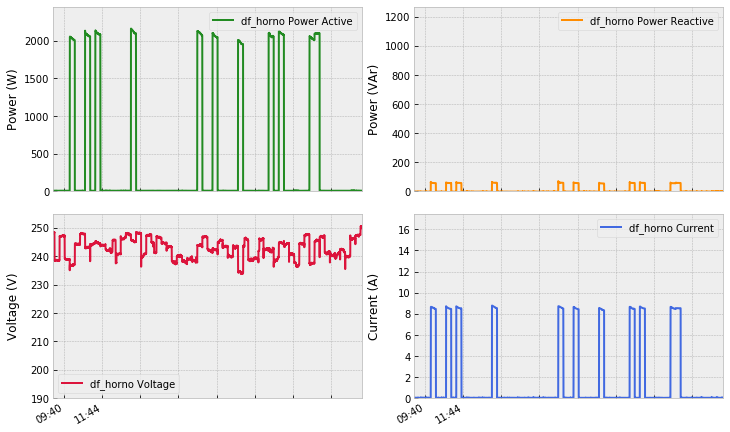

In [143]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


#ax1.set(xlim=('2023-03-07 11:10:38+01:00','2023-03-07 13:12+15:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (microondas)

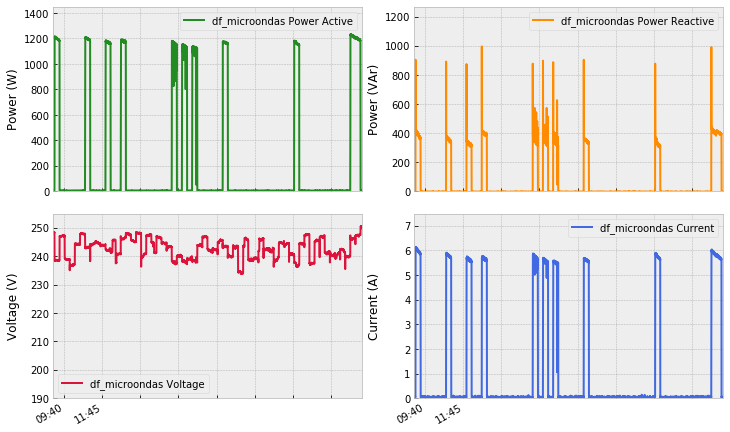

In [145]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

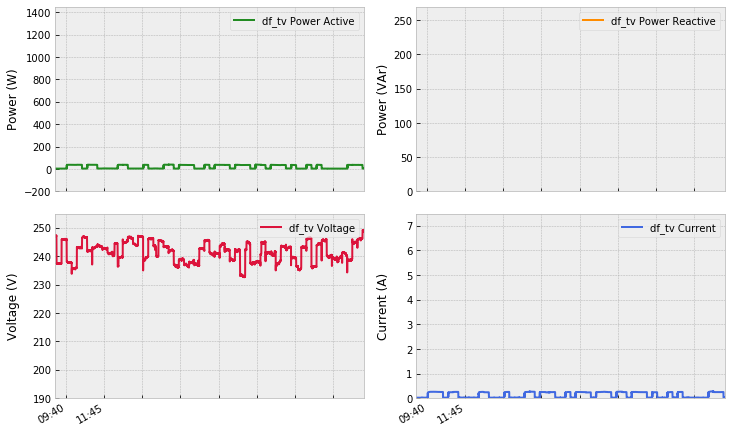

In [147]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_boiler.svg', bbox_inches='tight', transparent=True)
pass

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

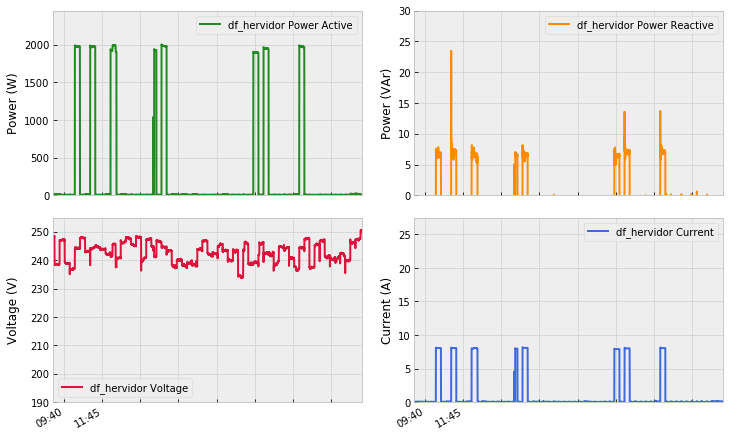

In [151]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,30])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,27.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

###  Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

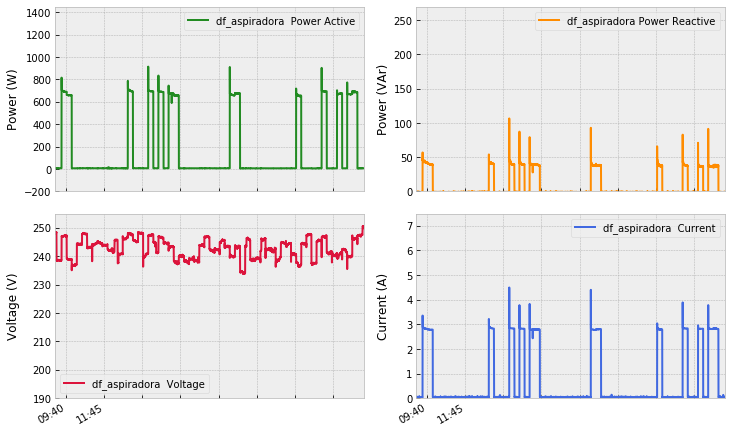

In [152]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

### Estufa de aceite

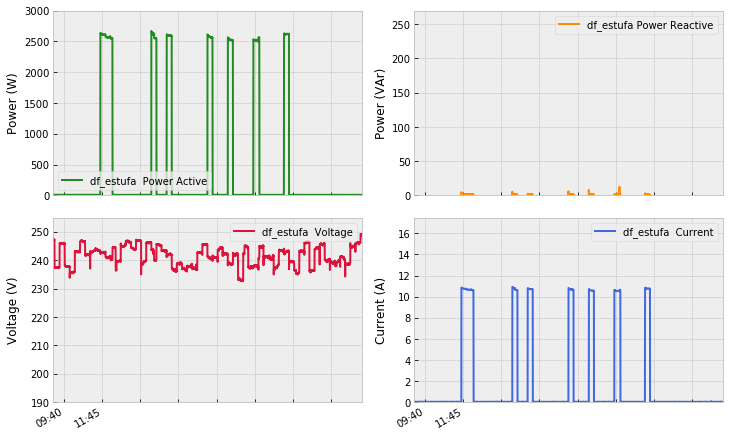

In [154]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,3000])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

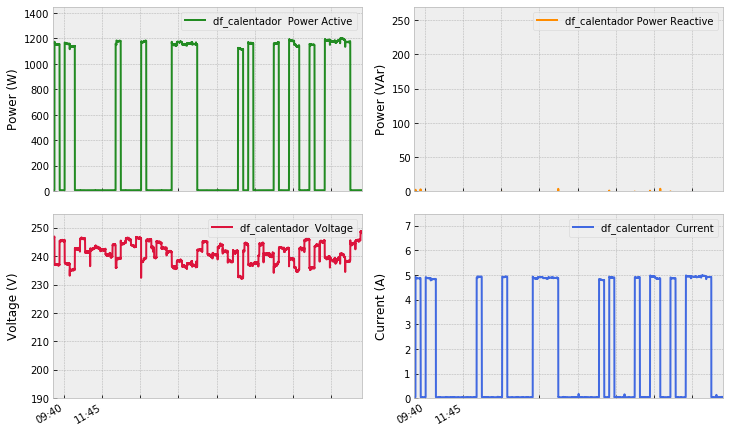

In [155]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

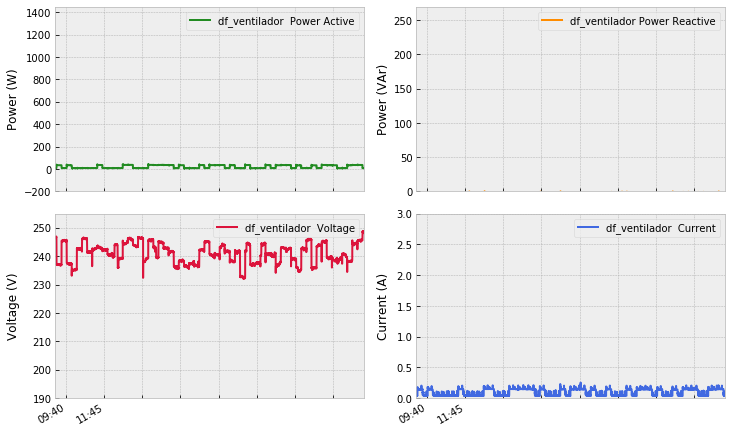

In [156]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,3])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

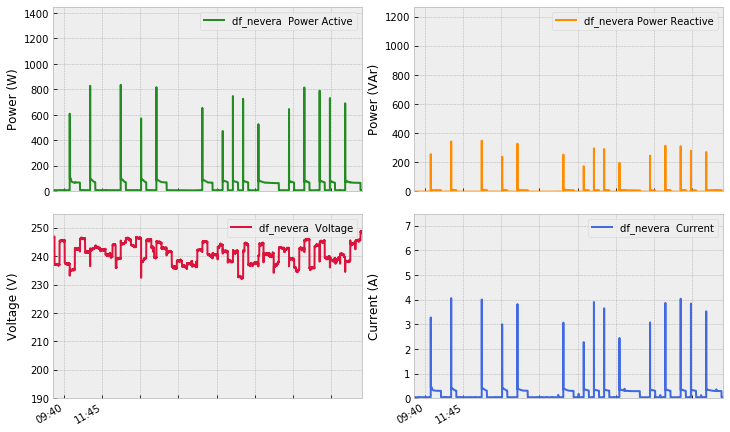

In [157]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_nevera.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

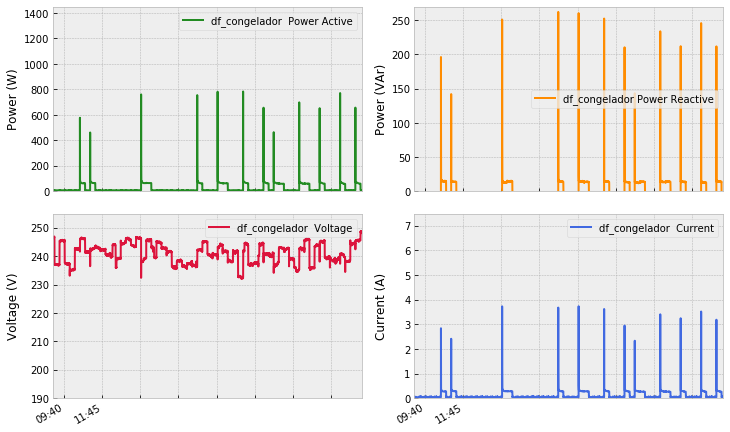

In [158]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

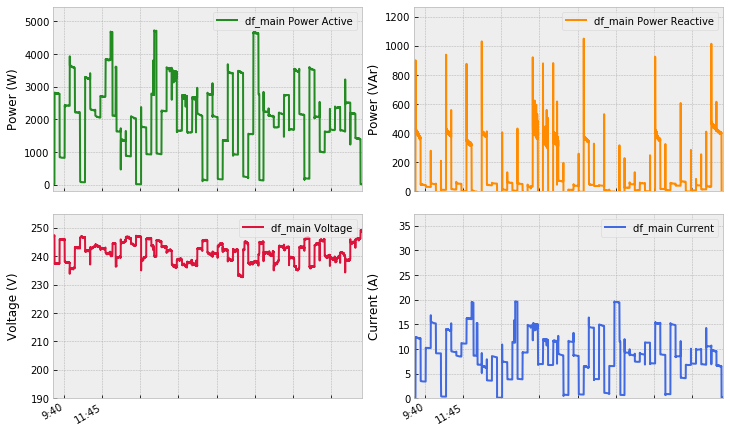

In [165]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([-200,5450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,37.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

### Trazar los electrodomésticos cuando estén en uso

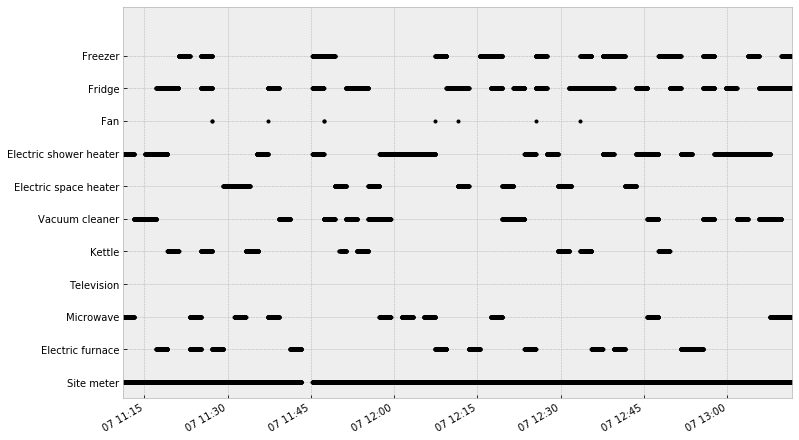

In [166]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

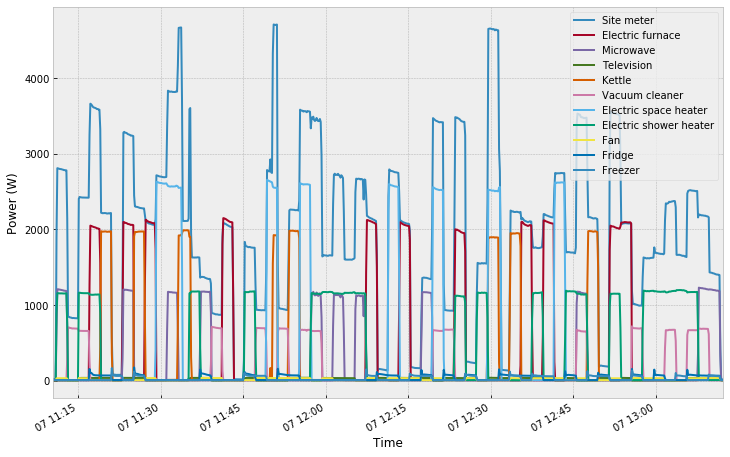

In [167]:
dsualm.set_window(start='2023-03-07', end='2023-03-08')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [168]:
from pandas.plotting import autocorrelation_plot

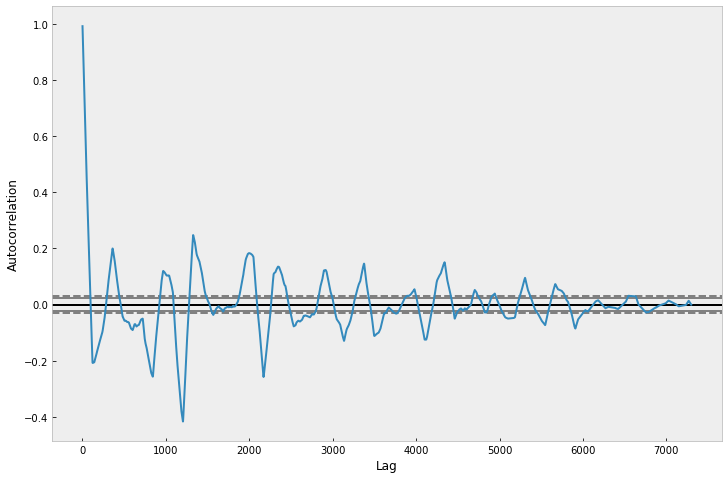

In [169]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [170]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

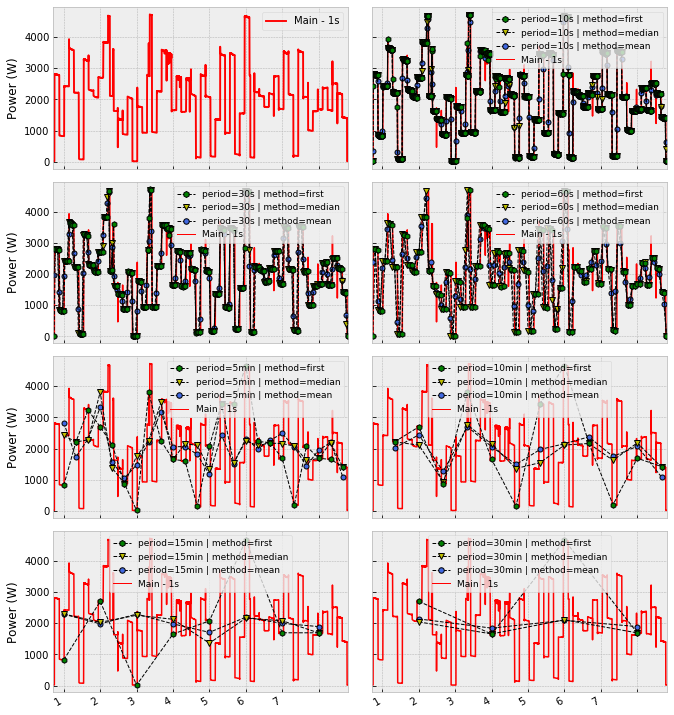

In [171]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

#ax1.set(xlim=('2023-03-07 11:10:38+01:00','2022-03-07 13:12:15+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [112]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

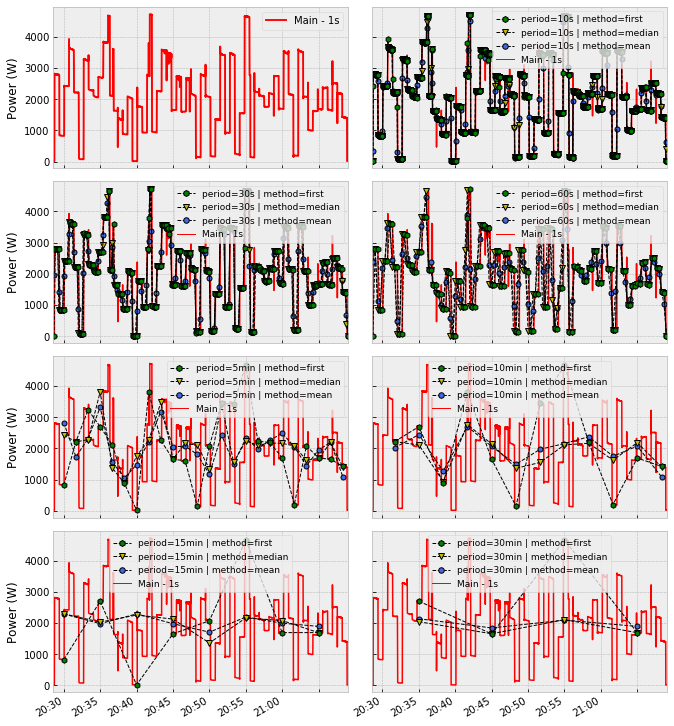

In [172]:
rcParams['figure.figsize'] = (11, 14)


t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    

#ax1.set(xlim=('2023-03-07 11:10:38+01:00','2022-03-07 13:12:15+01:00'))
    
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass